# Load packages and data


In [503]:
conda update conda

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [506]:
conda install -c conda-forge scikit-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38h50d1736_0        16.9 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        16.9 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.8-2_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.11.0-py38hecd8cb5_0 --> conda-forge::conda-4.11.0-py38h50d1736_0



python_abi-3.8       | 4 KB      | ##################################### | 100% 
conda-4.11.0         | 16.9 MB   | ############################

In [43]:
!pip install scikit-learn==1.0.2

     |████████████████████████████████| 7.9 MB 4.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [482]:
# import the required libraries

# base libraries
import os

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Data manipulation
import numpy as np
import pandas as pd

# Data Pre-processing and transformation
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from functools import reduce

# do not print warnings
import warnings
warnings.filterwarnings("ignore")

In [515]:
company = pd.read_csv("company_information.csv")
signup = pd.read_csv("ga_signup_information.csv")

In [516]:
company.isnull().sum()

company_id                                    0
app_user                                      0
ever_contacted_support                        0
subscription_status                         339
left_trustpilot_review                        0
minutes_activity_last_7_days_mobile           0
minutes_activity_last_7_days_desktop          0
minutes_activity_last_7_days_all_devices      0
dtype: int64

In [517]:
signup.isnull().sum()

company_id                 0
free_trial_signup_date     0
google_analytics_medium    0
dtype: int64

In [518]:
print(company.shape, signup.shape)

(6299, 8) (6087, 3)


In [519]:
company.head()

,company_id,app_user,ever_contacted_support,subscription_status,left_trustpilot_review,minutes_activity_last_7_days_mobile,minutes_activity_last_7_days_desktop,minutes_activity_last_7_days_all_devices
0,17729840,True,False,Cancelled,True,0,0,0
1,17711836,True,True,Subscribed,False,0,0,0
2,17712950,True,True,Subscribed,False,35,0,35
3,17723760,False,True,Subscribed,False,0,0,0
4,17713380,False,True,Subscribed,False,2,0,13


In [520]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299 entries, 0 to 6298
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   company_id                                6299 non-null   int64 
 1   app_user                                  6299 non-null   bool  
 2   ever_contacted_support                    6299 non-null   bool  
 3   subscription_status                       5960 non-null   object
 4   left_trustpilot_review                    6299 non-null   bool  
 5   minutes_activity_last_7_days_mobile       6299 non-null   int64 
 6   minutes_activity_last_7_days_desktop      6299 non-null   int64 
 7   minutes_activity_last_7_days_all_devices  6299 non-null   int64 
dtypes: bool(3), int64(4), object(1)
memory usage: 264.6+ KB


In [521]:
signup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6087 entries, 0 to 6086
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   company_id               6087 non-null   int64 
 1   free_trial_signup_date   6087 non-null   object
 2   google_analytics_medium  6087 non-null   object
dtypes: int64(1), object(2)
memory usage: 142.8+ KB


In [522]:
signup.head()

,company_id,free_trial_signup_date,google_analytics_medium
0,17711836,2020-11-02,cpc
1,17712950,2020-11-08,cpc
2,17723760,2020-12-12,(none)
3,17713380,2020-11-09,cpc
4,17724228,2020-12-13,email


In [523]:
signup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6087 entries, 0 to 6086
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   company_id               6087 non-null   int64 
 1   free_trial_signup_date   6087 non-null   object
 2   google_analytics_medium  6087 non-null   object
dtypes: int64(1), object(2)
memory usage: 142.8+ KB


# Merging

In [524]:
# merging both dataframes 
df = company.merge(signup,on='company_id', how='inner')

# inspect the dimensions of our new combined dataset and drop any duplicates
print(df.shape)
df.drop_duplicates(keep ='first', inplace = True)
print(df.shape)

(6087, 10)
(6087, 10)


In [525]:
df.isnull().sum()

company_id                                    0
app_user                                      0
ever_contacted_support                        0
subscription_status                         339
left_trustpilot_review                        0
minutes_activity_last_7_days_mobile           0
minutes_activity_last_7_days_desktop          0
minutes_activity_last_7_days_all_devices      0
free_trial_signup_date                        0
google_analytics_medium                       0
dtype: int64

In [526]:
df.dropna(inplace=True)

In [527]:
#Convert to datetime 
df['free_trial_signup_date'] = pd.to_datetime(df['free_trial_signup_date'], format="%Y-%m-%d")
df['month'] = df['free_trial_signup_date'].dt.month
df['year'] = df['free_trial_signup_date'].dt.year
df['day_of_week'] = df['free_trial_signup_date'].dt.dayofweek
df = df.drop (columns=["free_trial_signup_date"],axis=1)
df.head()

,company_id,app_user,ever_contacted_support,subscription_status,left_trustpilot_review,minutes_activity_last_7_days_mobile,minutes_activity_last_7_days_desktop,minutes_activity_last_7_days_all_devices,google_analytics_medium,month,year,day_of_week
0,17711836,True,True,Subscribed,False,0,0,0,cpc,11,2020,0
1,17712950,True,True,Subscribed,False,35,0,35,cpc,11,2020,6
2,17723760,False,True,Subscribed,False,0,0,0,(none),12,2020,5
3,17713380,False,True,Subscribed,False,2,0,13,cpc,11,2020,0
4,17724228,False,False,Subscribed,False,0,0,0,email,12,2020,6


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5748 entries, 0 to 6086
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   company_id                                5748 non-null   int64 
 1   app_user                                  5748 non-null   bool  
 2   ever_contacted_support                    5748 non-null   bool  
 3   subscription_status                       5748 non-null   object
 4   left_trustpilot_review                    5748 non-null   bool  
 5   minutes_activity_last_7_days_mobile       5748 non-null   int64 
 6   minutes_activity_last_7_days_desktop      5748 non-null   int64 
 7   minutes_activity_last_7_days_all_devices  5748 non-null   int64 
 8   google_analytics_medium                   5748 non-null   object
 9   month                                     5748 non-null   int64 
 10  year                                      5748 n

In [529]:
#convert true/false to 1.0
df["app_user"] = df["app_user"].astype(int)
df["ever_contacted_support"] =df["ever_contacted_support"].astype(int)
df["left_trustpilot_review"] =df["left_trustpilot_review"].astype(int)
#convert id to string value
df["company_id"] =df["company_id"].astype(str)
#rename
df["subscription_status"] =df["subscription_status"] .replace("Subscribed",1,regex=True).replace("Cancelled",0,regex=True)


In [530]:
df.head()

,company_id,app_user,ever_contacted_support,subscription_status,left_trustpilot_review,minutes_activity_last_7_days_mobile,minutes_activity_last_7_days_desktop,minutes_activity_last_7_days_all_devices,google_analytics_medium,month,year,day_of_week
0,17711836,1,1,1,0,0,0,0,cpc,11,2020,0
1,17712950,1,1,1,0,35,0,35,cpc,11,2020,6
2,17723760,0,1,1,0,0,0,0,(none),12,2020,5
3,17713380,0,1,1,0,2,0,13,cpc,11,2020,0
4,17724228,0,0,1,0,0,0,0,email,12,2020,6


# train-test split

In [531]:
def evaluate_on_test(model, y_test, X_test):
    yhat = model.predict(X_test)
    print(classification_report(y_test, yhat))

In [532]:
#train-test-split 
from sklearn.model_selection import StratifiedShuffleSplit

stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=2022)

train_index, test_index = list(stratified_splitter.split(df, df["subscription_status"]))[0]
trainset = df.iloc[train_index]
testset = df.iloc[test_index]

# verify the dimensions of the datasets
print(f"{trainset.shape[0]} train and {testset.shape[0]} test instances")


4598 train and 1150 test instances


# stratified sampling 

In [533]:
def subscription_proportions(data):
    return data["subscription_status"].value_counts() / len(data)

# create a random split
rand_train_set, rand_test_set = train_test_split(df, test_size=0.2, random_state=7)

# create a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": subscription_proportions(df),
    "Random test set": subscription_proportions(rand_test_set),
    "Stratified test set": subscription_proportions(testset),
}).sort_index()

# add two columns for the percent of the difference to the overall proportion
df_tmp["Rand. %error"] = 100 * df_tmp["Random test set"] / df_tmp["Overall"] - 100
df_tmp["Strat. %error"] = 100 * df_tmp["Stratified test set"] / df_tmp["Overall"] - 100

df_tmp

,Overall,Random test set,Stratified test set,Rand. %error,Strat. %error
0,0.264788,0.251304,0.265217,-5.092156,0.162258
1,0.735212,0.748696,0.734783,1.833947,-0.058437


# handling outliers 

In [495]:
#Outliers 
from sklearn.base import TransformerMixin, BaseEstimator
class OutlierTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        self.fitted = False
        return None
    def fit(self, X):
        #Select and handle outliers for only the columns containing numerical variables
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        numeric_X = X.select_dtypes(include=numerics)
        # Get Quantiles and IQR
        self.quantiles = pd.DataFrame(numeric_X.quantile([0.25, 0.75]))
        self.quantiles.loc['IQR',:] = self.quantiles.loc[0.75,:] - self.quantiles.loc[0.25,:]
        #Calculate Upper and Lower Bounds
        #These bounds are calculated on the Train Dataset, then applied to the train and test datasets
        self.quantiles.loc['Lower_Bound',:] = self.quantiles.loc[0.25,:] - 1.5 * self.quantiles.loc['IQR',:]
        self.quantiles.loc['Upper_Bound',:] = self.quantiles.loc[0.75,:] + 1.5 * self.quantiles.loc['IQR',:]
        #Save fitting status
        self.fitted = True
        return self
    def transform(self, X):
        if self.fitted == False:
            print('The transformer must be fitted before transformation.')
            return None
        #Make a copy of X to avoid mutating X
        X_copy = X.copy()
        #Old number of NaNs to count number of outliers
        old_num_na = sum(X_copy.isna().sum())
        for col in self.quantiles.columns:
            #Fill Beyond Lower Bound
            X_copy.loc[X_copy.loc[:,col] < self.quantiles.loc['Lower_Bound',col],col] = np.NaN
            #Fill Beyond Upper Bound
            X_copy.loc[X_copy.loc[:,col] > self.quantiles.loc['Upper_Bound',col],col] = np.NaN
            #Print Number of Outliers
            print(str(sum(X_copy.isna().sum()) - old_num_na) + ' Outliers are Identified.')
            return X_copy
# the above function is called then fitted on the train dataframe
# and transforms the train dataframe
outlier_transformer = OutlierTransformer()
trainset = outlier_transformer.fit_transform(trainset)
# All the outliers were transformed as NaN

0 Outliers are Identified.


In [413]:
testset = outlier_transformer.transform(testset)

0 Outliers are Identified.


In [534]:
# drop accident index column as we no longer need it
trainset.drop('company_id', axis=1, inplace=True)
testset.drop('company_id', axis=1, inplace=True)

Since we don't have any missing values in any independent variables, we don't need to imput values. Missing values in the target has been removed. 

# Encoding dummy variables

In [535]:
#encoding dummy variables 
from sklearn.preprocessing import OneHotEncoder


def get_dummies(trainset, testset, old_col_name):
    """Given a trainset, a testset, and the name of a column holding a 
    categorical variable, fit an encoder on the trainset, and use the 
    encoder to add dummy columns into the trainset and testset
    """
    
    one_hot_encoder = OneHotEncoder(drop="first", sparse=False)
    
    # the input to the encoder must be a 2-d numpy array,
    # so we take the column, extract their values and reshape the array to be 2-d
    cat_vals = trainset[old_col_name].values.reshape(-1,1)

    # fit an encoder and transform the **trainset**
    # the output is a new numpy array
    transformed = one_hot_encoder.fit_transform(cat_vals)
    
    # in the list of new columns, convert numpy array to a list and
    # drop the first column, because we requested "drop='first'"
    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    
    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        trainset[new_col_name] = transformed[:,i]
    
    # transform the **testset** using the fitted encoder
    
    cat_vals = testset[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)

    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the testset dataframe
        testset[new_col_name] = transformed[:,i]
    
    return trainset, testset


for col_name in ['google_analytics_medium']:
    trainset, testset = get_dummies(trainset, testset, col_name)

# check if the dummies are produced correctly in the trainset
trainset.head()


,app_user,ever_contacted_support,subscription_status,left_trustpilot_review,minutes_activity_last_7_days_mobile,minutes_activity_last_7_days_desktop,minutes_activity_last_7_days_all_devices,google_analytics_medium,month,year,day_of_week,cpc,email,organic,social
1650,0,0,0,0,0,0,0,(none),1,2021,5,0.0,0.0,0.0,0.0
2040,1,1,1,1,0,0,0,organic,9,2020,4,0.0,0.0,1.0,0.0
4619,0,0,1,0,0,0,0,organic,12,2019,6,0.0,0.0,1.0,0.0
3382,0,1,1,0,0,0,1,organic,12,2019,2,0.0,0.0,1.0,0.0
54,1,0,0,1,0,0,0,(none),12,2020,2,0.0,0.0,0.0,0.0


In [536]:
# with our dummy variables in place, we can remove the labelled columns for the same categorical variables
def dropfunc(data, column_list):
    for column in data:
        if column in column_list:
            del data[column]

column_list = ['google_analytics_medium'] 

dropfunc(trainset, column_list)
dropfunc(testset, column_list)

trainset.head()


,app_user,ever_contacted_support,subscription_status,left_trustpilot_review,minutes_activity_last_7_days_mobile,minutes_activity_last_7_days_desktop,minutes_activity_last_7_days_all_devices,month,year,day_of_week,cpc,email,organic,social
1650,0,0,0,0,0,0,0,1,2021,5,0.0,0.0,0.0,0.0
2040,1,1,1,1,0,0,0,9,2020,4,0.0,0.0,1.0,0.0
4619,0,0,1,0,0,0,0,12,2019,6,0.0,0.0,1.0,0.0
3382,0,1,1,0,0,0,1,12,2019,2,0.0,0.0,1.0,0.0
54,1,0,0,1,0,0,0,12,2020,2,0.0,0.0,0.0,0.0


# feature scaling

# Split x_train, x_test, y_train, y_test

In [537]:
# drop labels for training set, but keep all others
X_train = trainset.drop("subscription_status", axis=1)
X_test = testset.drop("subscription_status", axis=1)

y_train = trainset["subscription_status"].copy()
y_test = testset["subscription_status"].copy()

X_train = X_train.drop(columns=["minutes_activity_last_7_days_desktop","minutes_activity_last_7_days_mobile"],axis=1)
X_test = X_test.drop(columns=["minutes_activity_last_7_days_desktop","minutes_activity_last_7_days_mobile"],axis=1)


# feature selection

In [538]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
impList = zip(X_train.columns, importance)
for feature in sorted(impList, key = lambda t: t[1], reverse=True):
    print(feature)

('year', 0.8023430342993858)
('ever_contacted_support', 0.0859414747401676)
('month', 0.04962641490645874)
('day_of_week', 0.030098270769350514)
('minutes_activity_last_7_days_all_devices', 0.009815841840554462)
('app_user', 0.006230144932730695)
('organic', 0.005584211566112514)
('left_trustpilot_review', 0.0032801265363527317)
('cpc', 0.00320321202159528)
('social', 0.002241167888247771)
('email', 0.0016361004990438398)


[0.00893574 0.40546853 0.00878347 0.01461033 0.08552164 0.25524025
 0.02552415 0.01248791 0.02461548 0.15764153 0.00117099]


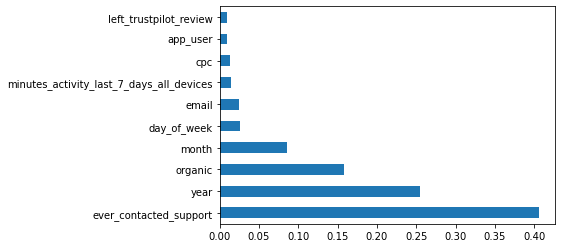

In [539]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [540]:
#rename
y_train =y_train.replace(1,"Subscribed",regex=True).replace(0,"Cancelled",regex=True)
y_test =y_test.replace(1,"Subscribed",regex=True).replace(0,"Cancelled",regex=True)


# Baseline

Calculate the F-score for the majority baseline (every class label is "Subscribed"):

In [541]:
trainset["subscription_status"].value_counts()

1    3381
0    1217
Name: subscription_status, dtype: int64

In [542]:
n_subscribed = trainset["subscription_status"].value_counts()[1]
n_instances = trainset.shape[0]

In [543]:
# For the "Subscribed" label, the accuracy measures will be:
subscribed_precision = n_subscribed/n_instances
subscribed_recall = n_subscribed/n_subscribed
subscribed_fscore = 2/(1/subscribed_precision + 1/subscribed_recall)

# For the "cancelled" label, it will be:
cancelled_precision = 0.0
cancelled_recall = 0.0
cancelled_fscore = 0.0

# The averages of the two classes, i.e. the eventual baseline scores:
p = (subscribed_precision+cancelled_precision)/2
r = (subscribed_recall+cancelled_recall)/2
f = (subscribed_fscore+cancelled_fscore)/2

print(f"Precision: {p:.5}")
print(f"Recall: {r:.5}")
print(f"F-score: {f:.5}")

Precision: 0.36766
Recall: 0.5
F-score: 0.42374


# Build model

In [544]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# specify the hyperparameters and their values
param_grid = [
    {'n_estimators': [100, 200, 500],
     'max_depth': [5, None]},
]

forest = RandomForestClassifier(random_state=7)

rf_grid_search = GridSearchCV(forest, param_grid, cv=10, 
                              scoring='f1_macro',
                              return_train_score=True)

rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=7),
             param_grid=[{'max_depth': [5, None],
                          'n_estimators': [100, 200, 500]}],
             return_train_score=True, scoring='f1_macro')

In [545]:
# the best model
rf_grid_search.best_estimator_

RandomForestClassifier(n_estimators=200, random_state=7)

In [546]:
rf_grid_search.best_score_

0.9659083109579913

In [547]:
# training and validation RMSE

cv_results = pd.DataFrame(rf_grid_search.cv_results_
                         )[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
4,"{'max_depth': None, 'n_estimators': 200}",0.981694,0.965908,1.608030
5,"{'max_depth': None, 'n_estimators': 500}",0.981697,0.965305,1.669735
3,"{'max_depth': None, 'n_estimators': 100}",0.981697,0.965076,1.693112
0,"{'max_depth': 5, 'n_estimators': 100}",0.963929,0.962546,0.143518
1,"{'max_depth': 5, 'n_estimators': 200}",0.964726,0.961758,0.307602
2,"{'max_depth': 5, 'n_estimators': 500}",0.963631,0.961161,0.256360


In [509]:
#weight of important features
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)



RandomForestClassifier(n_estimators=200)

In [510]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

year                                        0.321397
ever_contacted_support                      0.285080
month                                       0.194452
organic                                     0.103240
day_of_week                                 0.030391
email                                       0.020023
minutes_activity_last_7_days_all_devices    0.015135
cpc                                         0.011781
left_trustpilot_review                      0.008980
app_user                                    0.008116
social                                      0.001406
dtype: float64

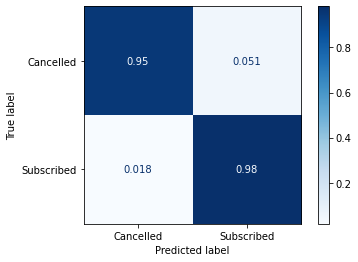

In [548]:
#The confusion matrix on the training data:
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
# cross-validation confusion matrix, training data
y_pred = cross_val_predict(rf_grid_search.best_estimator_, X_train, y_train, cv=10)
conf_mat = confusion_matrix(y_train, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=rf_grid_search.best_estimator_.classes_
                      ).plot(cmap=plt.cm.Blues)

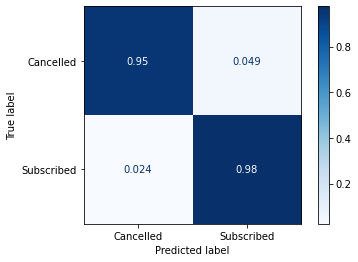

In [428]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.ERROR)
#The confusion matrix on the test data:
ConfusionMatrixDisplay.from_estimator(rf_grid_search.best_estimator_, X_test, y_test,
                                 display_labels=rf_grid_search.best_estimator_.classes_,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [549]:
evaluate_on_test(rf_grid_search.best_estimator_, y_test, X_test)

              precision    recall  f1-score   support

   Cancelled       0.94      0.95      0.94       305
  Subscribed       0.98      0.98      0.98       845

    accuracy                           0.97      1150
   macro avg       0.96      0.96      0.96      1150
weighted avg       0.97      0.97      0.97      1150

